In [1]:
import distl
import numpy as np

# Multivariate Gaussian

First we'll create a [multivariate gaussian](../api/MVGaussian.md) distribution by providing the means and covariances of three parameters.

In [2]:
mvg = distl.mvgaussian([5,10, 12], 
                       np.array([[ 2,  1, -1], 
                                 [ 1,  2,  1], 
                                 [-1,  1,  2]]),
                       allow_singular=True,
                       labels=['a', 'b', 'c'])

In [3]:
mvg.sample()

array([ 8.13858284, 10.35261798,  9.21403513])

In [4]:
mvg.sample(size=5)

array([[ 1.28893149,  7.3480004 , 13.05906891],
       [ 4.33293529, 10.34270443, 13.00976913],
       [ 5.666064  , 10.69490313, 12.02883913],
       [ 4.6536998 , 11.15947346, 13.50577366],
       [ 5.24455424, 10.92066427, 12.67611003]])

and plotting will now show a corner plot (if [corner](https://corner.readthedocs.io/en/latest/) is installed)

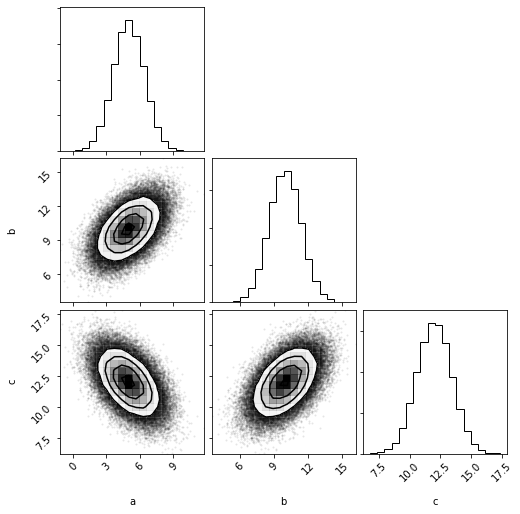

In [5]:
fig = mvg.plot(show=True)

# Multivariate Histogram

we can now convert this multivariate gaussian distribution into a [multivariate histogram](../api/MVHistogram.md) distribution (alternatively we could create a histogram directly from a set of samples or chains via [mvhistogram_from_data](../api/distl.mvhistogram_from_data.md).

In [6]:
mvh = mvg.to_mvhistogram(bins=15)

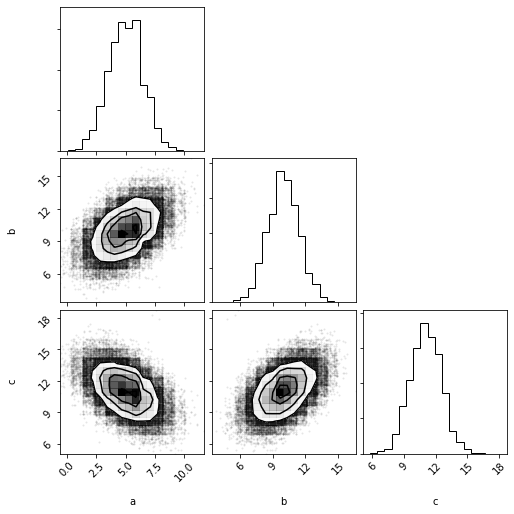

In [7]:
fig = mvh.plot(show=True, size=1e6)

In [8]:
np.asarray(mvh.density.shape)

array([15, 15, 15])

Now if we access the means and covariances, we'll see that they are slightly different due to the binning.

In [9]:
mvh.calculate_means()

array([ 4.96368473,  9.96922446, 11.05371179])

In [10]:
mvh.calculate_covariances()

array([[ 2.13461035,  0.9810571 , -0.99805398],
       [ 0.9810571 ,  2.13494765,  1.0017221 ],
       [-0.99805398,  1.0017221 ,  2.14112846]])

If we convert back to a multivariate gaussian, these are the means and covariances that will be adopted (technically not exactly as they'll be recomputed from another sampling of the underlying distribution).

In [11]:
mvhg = mvh.to_mvgaussian()

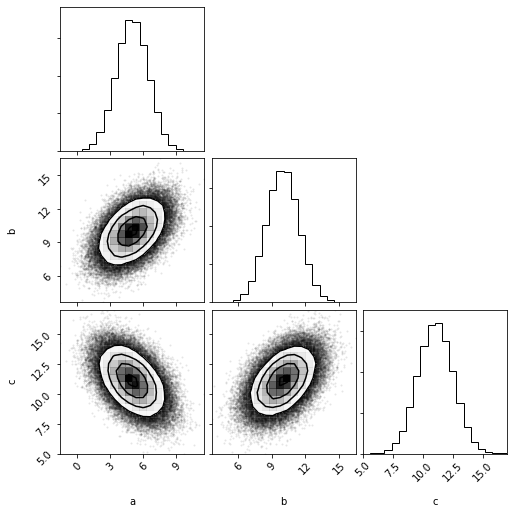

In [12]:
fig = mvhg.plot(show=True)

In [13]:
mvhg.mean

array([ 4.96983076,  9.96986865, 11.05145188])

In [14]:
mvhg.cov

array([[ 2.15068612,  0.98938779, -1.00598993],
       [ 0.98938779,  2.14515829,  1.00431943],
       [-1.00598993,  1.00431943,  2.14788639]])

# Take Dimensions

In [15]:
mvg_ac = mvg.take_dimensions(['a', 'c'])

In [16]:
mvg_ac.sample()

array([ 3.90118612, 11.99159429])

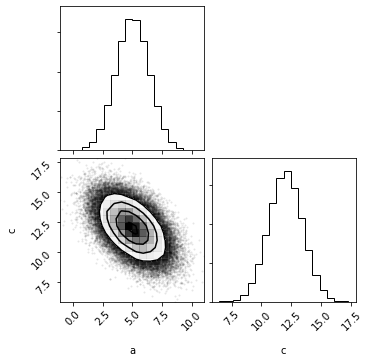

In [17]:
out = mvg_ac.plot(show=True)

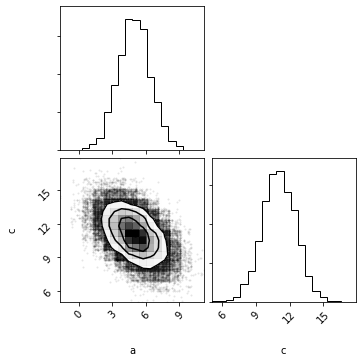

In [18]:
out = mvh.take_dimensions(['a', 'c']).plot(show=True)

# Slicing

Slicing allows taking a single dimension while retaining all underlying covariances such that the resulting distribution can undergo [math operations](./math.ipynb), [and/or logic](./and_or.ipynb), and included in [distribution collections](./collections.ipynb).  For more details, see the [slice examples](./slice.ipynb).

In [19]:
mvg_a = mvg.slice('a')

In [20]:
mvg_a.sample()

3.4155760454813677

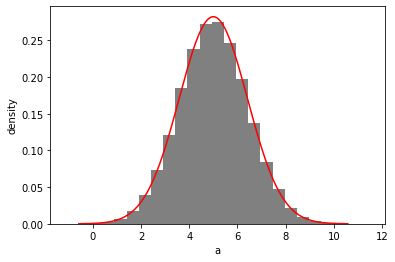

In [21]:
out = mvg_a.plot(show=True)